# Clustering with K-means

We investigate the k-means algorithm. First we implement the algorithm and run it on a Gaussian mixture toy-dataset, then apply it to a dataset of pulsar candidate observations.   

In [51]:
import sys
from pathlib import Path
project_root = Path.cwd().parent  # Adjust this if needed
sys.path.append(str(project_root / "src"))
import src.k_means as k_means
import src.plotting as plotter
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing
import sklearn.cluster


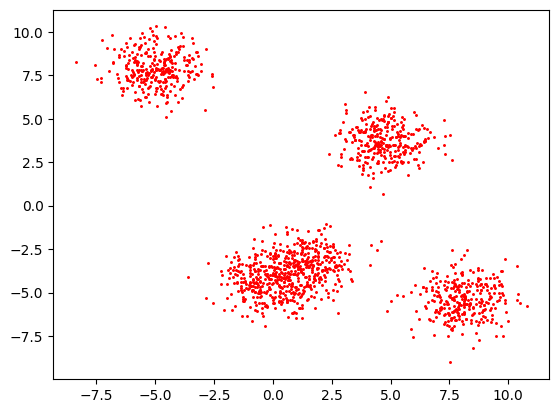

In [52]:
k = 5 #Clusters
n = 300 #Datapoints per cluster
d=2 #Dimensions
mean_range=(-10,10)
std_dev=1.0
X = k_means.generate_gaussian_mixture_data(k,n,d,mean_range, std_dev)

plt.scatter(X[:,0], X[:,1], c='r', marker='.', s=5)
plt.show()

K-means converged to tol 1e-05 after 7 iterations.


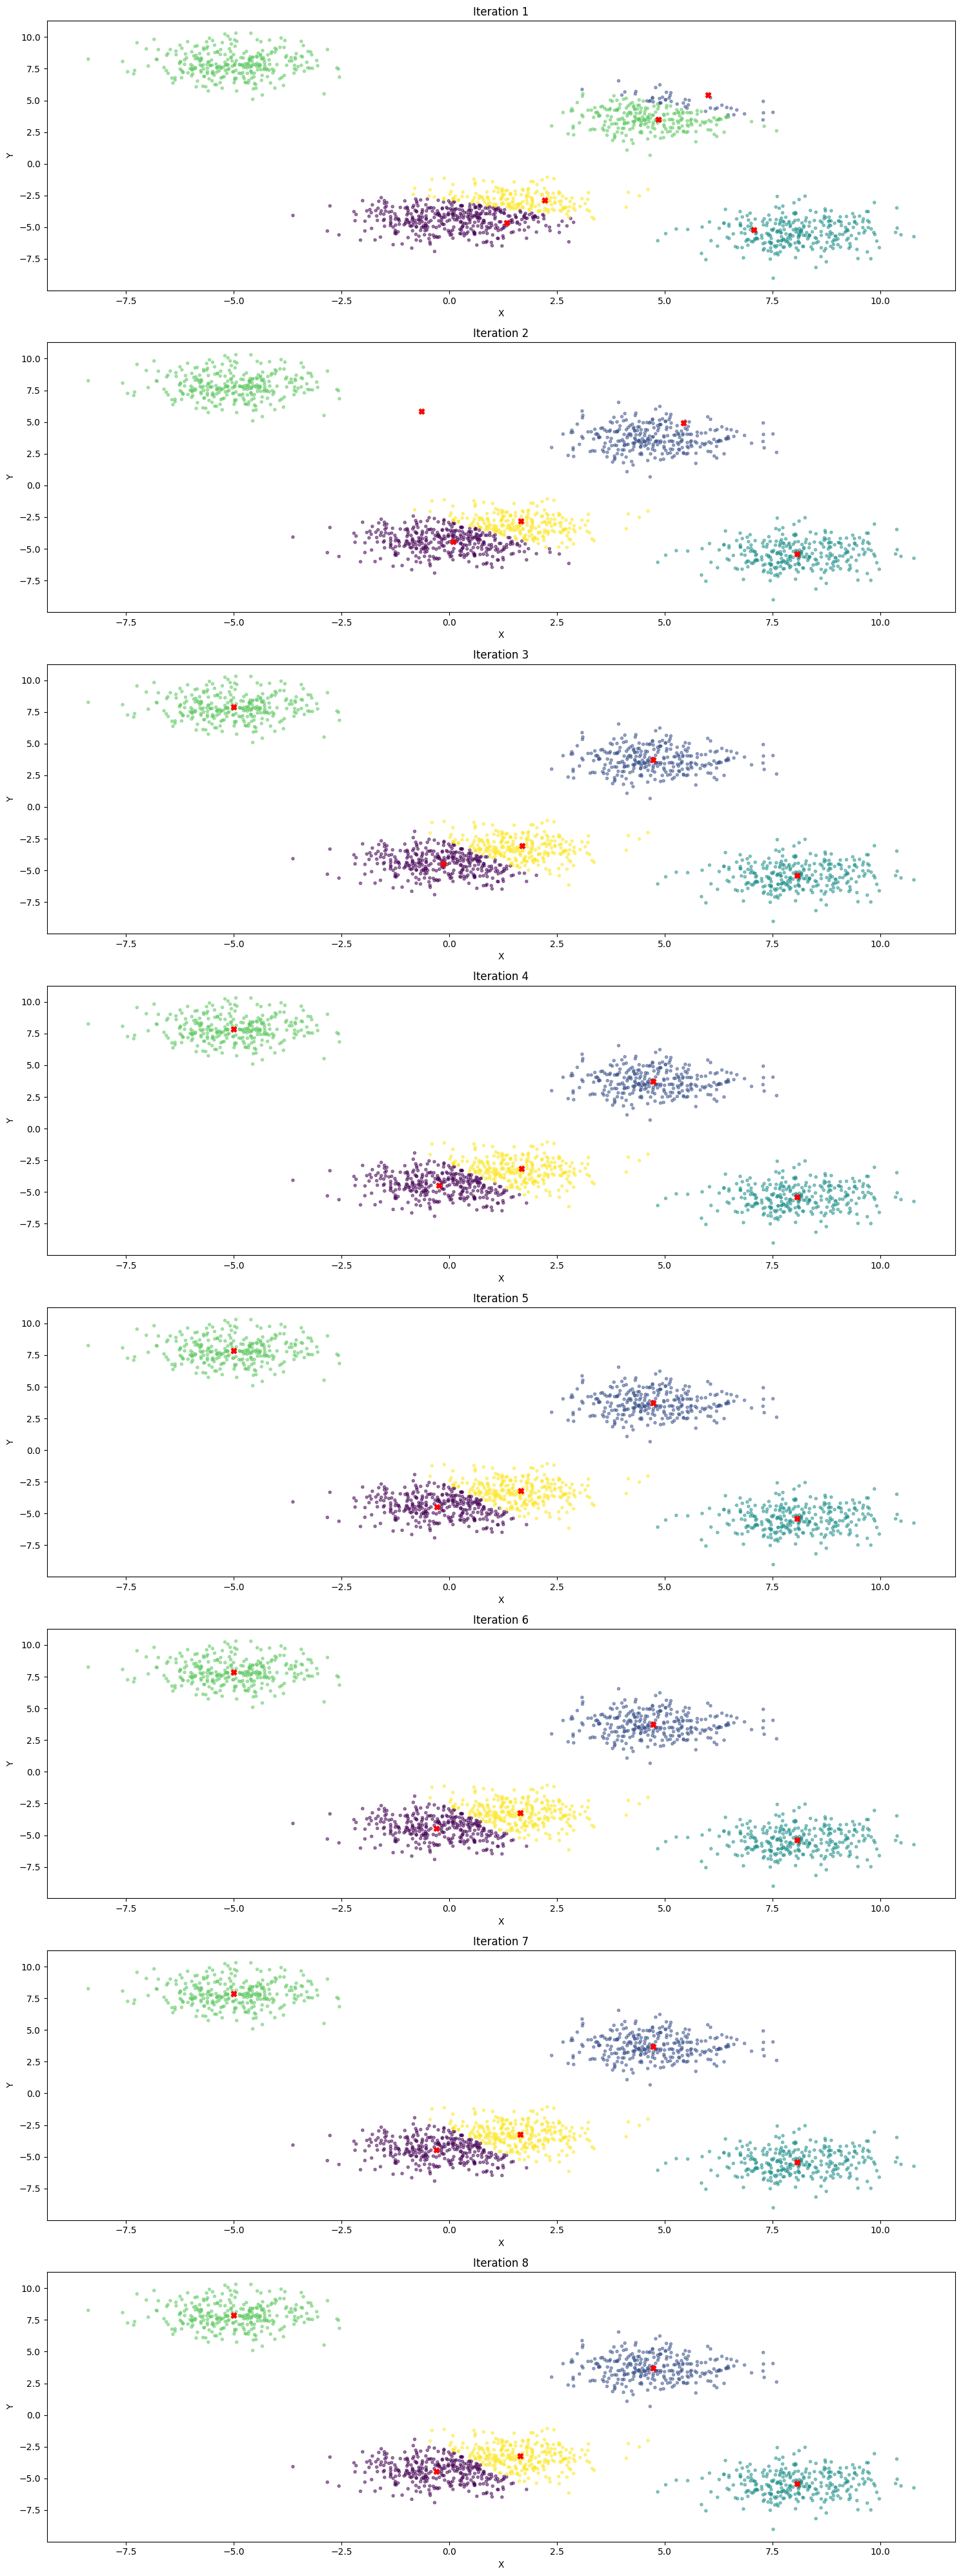

In [53]:
cf, af, centr, assigns = k_means.kmeans(X, k, max_iters=100, tol=1e-5)
plotter.plot_kmeans_iterations(X,centr,assigns)

### Clustering of pulsar observation data
We now consider a dataset of pulsar candidates from the HTRU survey. You can download the data and read the description of the data on the [UCI machine learning repository](https://archive.ics.uci.edu/dataset/372/htru2). The .csv file is also provided on Moodle with the exercise. Our goal is to see in how far pulsars and false pulsar candidates are represented by two different clusters which we can automatically discover via clustering. While this is a very simple method, k-means has been applied extensively in scientific data analysis, for an example from astrophysics similar to our pulsar candidate clustering here, see [Turner et al. 2019](https://academic.oup.com/mnras/article/482/1/126/5116177) who are clustering galaxy survey data. But now to the pulsar candidates.  

In [54]:
import pandas as pd
notebook_path = Path().resolve()  # Current notebook's directory
data_path = notebook_path.parent / "k-means Clustering" / "data" / "raw" / "HTRU_2.csv"
data = np.loadtxt(data_path, delimiter=',')

print(f'data shape {data.shape}')
print(f'{data[:,-1].sum()} pulsars and {data.shape[0] - data[:,-1].sum()} non-pulsars')
print(f'mean and std of the features:\n', np.vstack([data[:,:-1].mean(axis=0), data[:,:-1].std(axis=0)]).T)

data shape (17898, 9)
1639.0 pulsars and 16259.0 non-pulsars
mean and std of the features:
 [[111.07996834  25.65221871]
 [ 46.54953156   6.84299824]
 [  0.47785726   1.06400999]
 [  1.770279     6.16774094]
 [ 12.61439966  29.47207378]
 [ 26.3265147   19.47002839]
 [  8.30355612   4.50596597]
 [104.8577087  106.51156389]]


In [55]:
# split features and labels
X = data[:,:-1]
y = data[:,-1]

# preprocess by standardizing
scaler =  sklearn.preprocessing.StandardScaler().fit(X)
X_s = scaler.transform(X)

skmeans = sklearn.cluster.KMeans(n_clusters=2)
skmeans.fit(X_s); y_pred = skmeans.labels_
sklearn.metrics.confusion_matrix(y, y_pred)
plt.show()
np.max([sklearn.metrics.accuracy_score(y_pred, y), 
        sklearn.metrics.accuracy_score(-(y_pred -1), y)]) 

0.9670354229522852

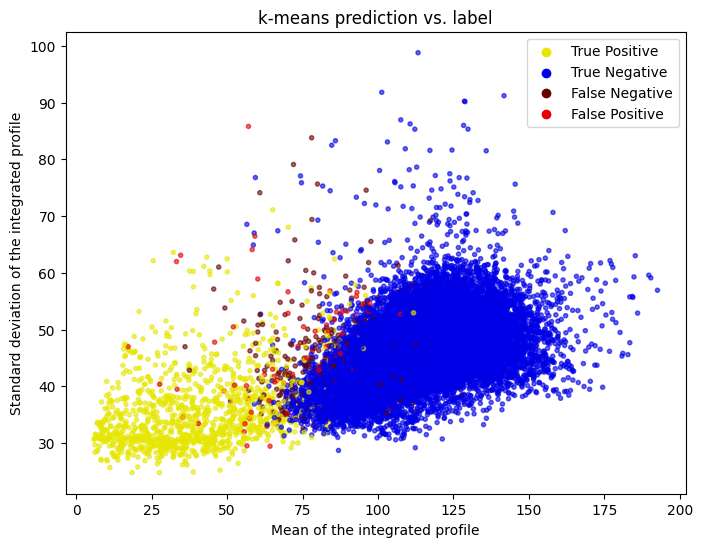

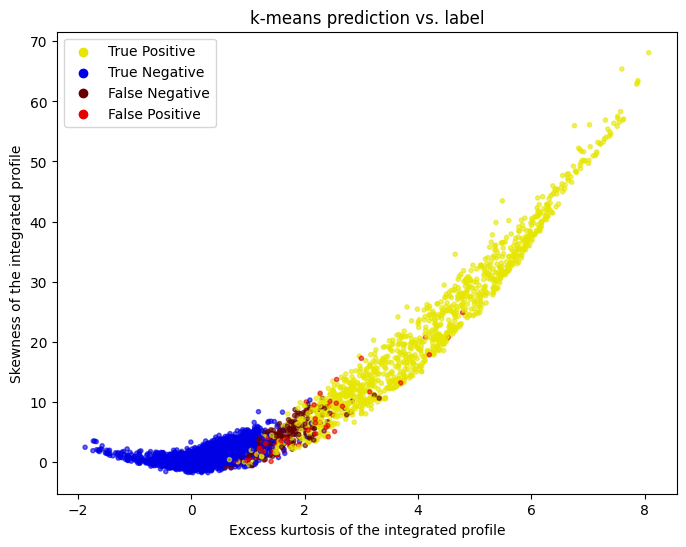

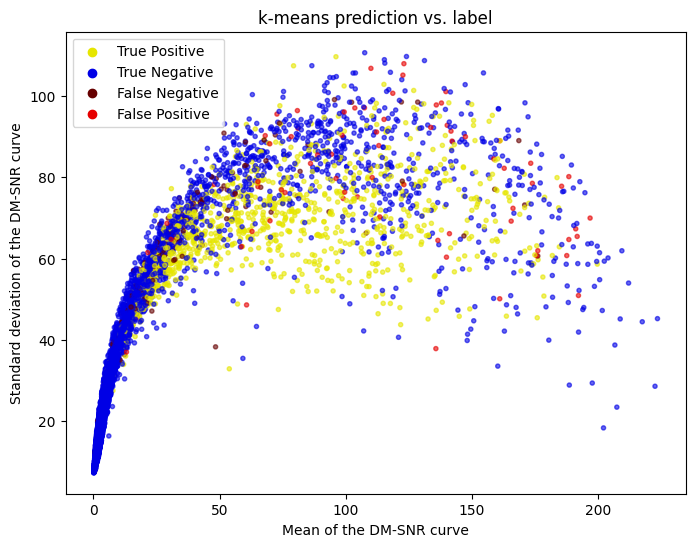

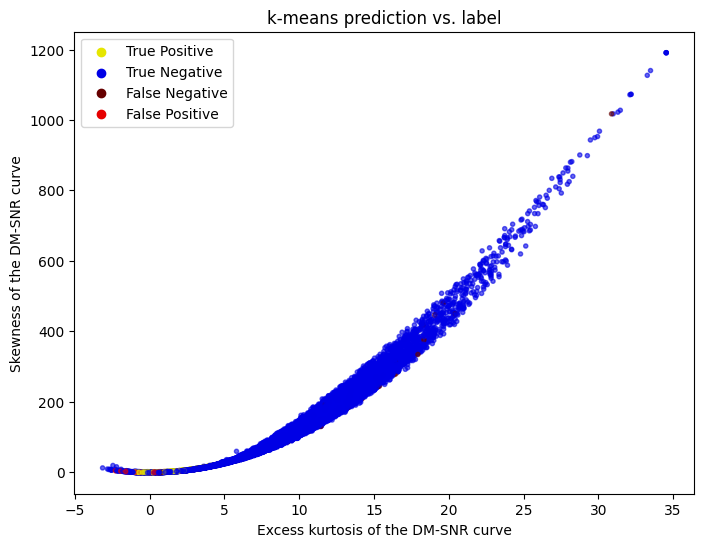

In [56]:
# in case the skmeans 0 labels correspond best to the ground truth 1 label, flip them 
if sklearn.metrics.accuracy_score(y_pred, y) < sklearn.metrics.accuracy_score(-(y_pred -1), y):
    y_pred = -(skmeans.labels_ - 1)
plotter.plot_pulsar_clusters_vs_labels(X, y, y_pred)